Team 11

Maneesha Narahari

Tharun Reddy Pasham

Manaswini Eda

Data Set:Phone Prices

Data Set link: https://www.kaggle.com/datasets/berkayeserr/phone-prices/data


The smartphone market is a vibrant landscape where countless features vie for attention, from longer battery life and larger storage capacities to sleeker designs and enhanced screen resolutions. Understanding the intricate relationship between these diverse features and their impact on the final price tag of a cellphone is crucial in today's competitive market. This analysis embarks on a journey to unravel the pricing dynamics by leveraging advanced data analysis techniques to predict cellphone prices based on their distinct attributes.

In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

**EDA**


Loading Cleaned Data: All Phones Dataset

In [72]:
df = pd.read_csv('cleaned_all_phones.csv')

First 5 Entries of the All Phones Dataset

In [73]:
df.head()

,phone_name,brand,os,inches,resolution,battery,battery_type,ram(GB),announcement_date,weight(g),...,video_1080p,video_4K,video_8K,video_30fps,video_60fps,video_120fps,video_240fps,video_480fps,video_960fps,price(USD)
0,Y6II Compact,Huawei,Android 5.1,5.0,720x1280,2200,Li-Po,2,2016-09-01,140.0,...,False,False,False,True,False,False,False,False,False,120.0
1,K20 plus,LG,Android 7.0,5.3,720x1280,2700,Li-Ion,2,2016-12-01,140.0,...,True,False,False,True,False,False,False,False,False,100.0
2,P8 Lite (2017),Huawei,Android 7.0,5.2,1080x1920,3000,Li-Ion,4,2017-01-01,147.0,...,True,False,False,True,False,False,False,False,False,420.0
3,Redmi Note 4,Xiaomi,Android 6.0,5.5,1080x1920,4100,Li-Po,4,2017-01-01,165.0,...,True,False,False,True,False,True,False,False,False,150.0
4,P10,Huawei,Android 7.0,5.1,1080x1920,3200,Li-Ion,4,2017-02-01,145.0,...,True,True,False,True,True,False,False,False,False,420.0


Column Names and Data Types

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   phone_name         1512 non-null   object 
 1   brand              1512 non-null   object 
 2   os                 1512 non-null   object 
 3   inches             1512 non-null   float64
 4   resolution         1512 non-null   object 
 5   battery            1512 non-null   int64  
 6   battery_type       1512 non-null   object 
 7   ram(GB)            1512 non-null   int64  
 8   announcement_date  1512 non-null   object 
 9   weight(g)          1512 non-null   float64
 10  storage(GB)        1512 non-null   int64  
 11  video_720p         1512 non-null   bool   
 12  video_1080p        1512 non-null   bool   
 13  video_4K           1512 non-null   bool   
 14  video_8K           1512 non-null   bool   
 15  video_30fps        1512 non-null   bool   
 16  video_60fps        1512 

Statistical Summary of numerical colums: All Phones Dataset

In [75]:
df.describe()

,inches,battery,ram(GB),weight(g),storage(GB),price(USD)
count,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000
mean,6.422460,4389.798942,6.683862,187.636243,109.164683,337.847036
std,0.477043,784.607022,2.701433,26.200115,74.436484,266.740821
min,3.800000,1821.000000,1.000000,130.000000,1.000000,40.000000
25%,6.300000,4000.000000,4.000000,175.000000,64.000000,179.997500
50%,6.500000,4500.000000,8.000000,187.000000,128.000000,260.000000
75%,6.670000,5000.000000,8.000000,197.250000,128.000000,400.000000
max,10.400000,7250.000000,24.000000,500.000000,512.000000,2300.000000


We had dropped null value colums using dropna Method

In [76]:
df.dropna(inplace=True)

In [77]:
df.isna().sum()

phone_name           0
brand                0
os                   0
inches               0
resolution           0
battery              0
battery_type         0
ram(GB)              0
announcement_date    0
weight(g)            0
storage(GB)          0
video_720p           0
video_1080p          0
video_4K             0
video_8K             0
video_30fps          0
video_60fps          0
video_120fps         0
video_240fps         0
video_480fps         0
video_960fps         0
price(USD)           0
dtype: int64

**Data Analysis with visualization**

The below code gives a bar plot showing the average battery size across different cellphone brands. Each bar represents the average battery size of a specific brand, providing a visual comparison of battery sizes among various brands.

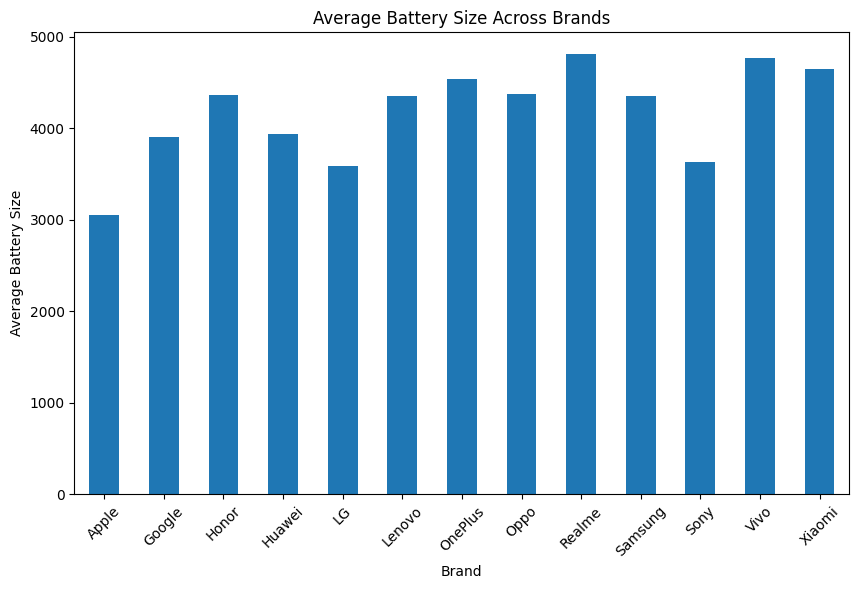

In [78]:
#How does the average battery size vary across different brands or operating systems?

# Average battery size across brands
average_battery_by_brand = df.groupby('brand')['battery'].mean()
average_battery_by_brand.plot(kind='bar', figsize=(10, 6))
plt.title('Average Battery Size Across Brands')
plt.xlabel('Brand')
plt.ylabel('Average Battery Size')
plt.xticks(rotation=45)
plt.show()


The resulting visualization showcases the counts of different video capabilities (720p, 1080p, 4K, 8K) for each cellphone brand, allowing for an easy comparison of video recording features among brands.

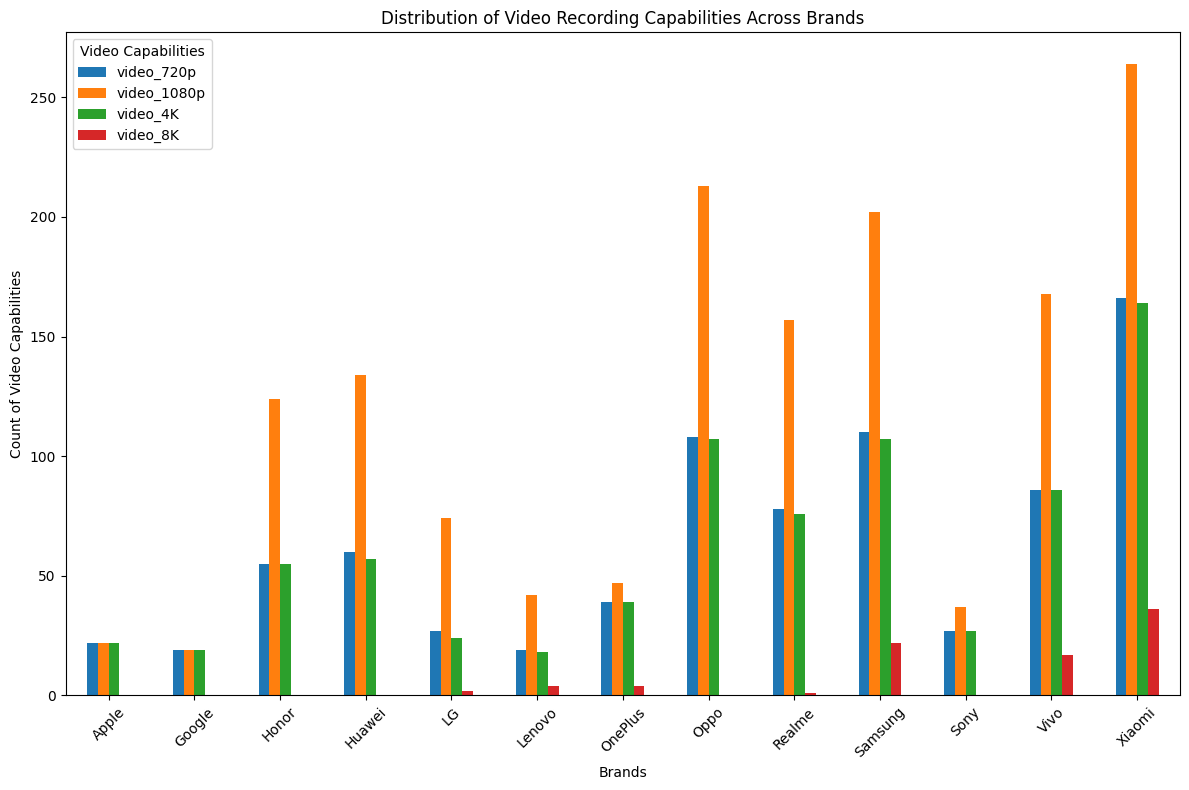

In [79]:
#What is the distribution of different video recording capabilities (720p, 1080p, 4K, etc.) across various brands
# Creating a new DataFrame with just the relevant columns
video_columns = ['video_720p', 'video_1080p', 'video_4K', 'video_8K']
video_df = df[['brand'] + video_columns]

# Grouping by brand and calculating the sums for each video capability
video_distribution = video_df.groupby('brand').sum().reset_index()

# Set the brands as the index for easier plotting
video_distribution.set_index('brand', inplace=True)

# Plotting the distribution of video capabilities for each brand
video_distribution.plot(kind='bar', figsize=(12, 8))
plt.title('Distribution of Video Recording Capabilities Across Brands')
plt.xlabel('Brands')
plt.ylabel('Count of Video Capabilities')
plt.xticks(rotation=45)
plt.legend(title='Video Capabilities')
plt.tight_layout()
plt.show()

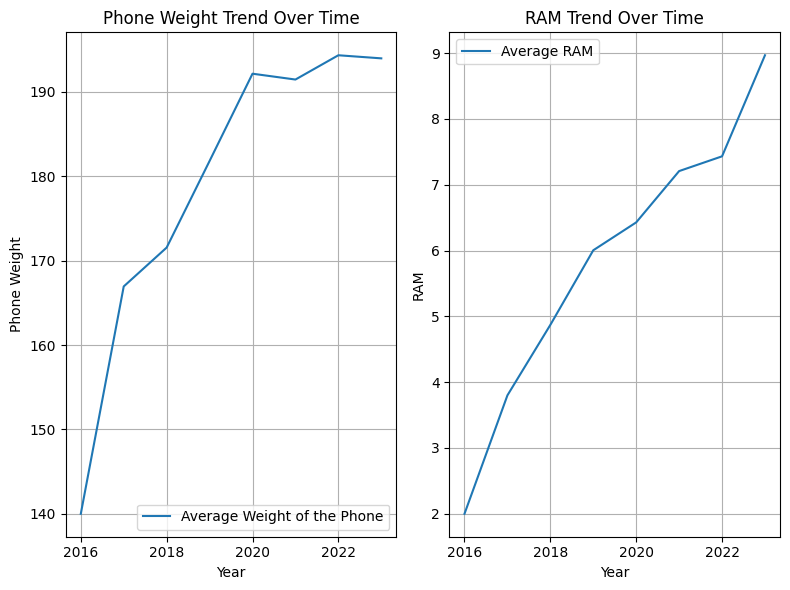

In [80]:
#Are there any technological advancements reflected in the announcements,
# such as increasing video capabilities or battery advancements, over the years?
# Convert 'announcement_date' column to datetime if it's not already
df['announcement_date'] = pd.to_datetime(df['announcement_date'])

# Create a figure with subplots
fig, axs = plt.subplots(1, 2, figsize=(8, 6))

# Battery capacity trend subplot
axs[0].plot(df.groupby(df['announcement_date'].dt.year)['weight(g)'].mean(), label='Average Weight of the Phone')
axs[0].set_title('Phone Weight Trend Over Time')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Phone Weight')
axs[0].legend()
axs[0].grid(True)

# RAM trend subplot
axs[1].plot(df.groupby(df['announcement_date'].dt.year)['ram(GB)'].mean(), label='Average RAM')
axs[1].set_title('RAM Trend Over Time')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('RAM')
axs[1].legend()
axs[1].grid(True)


# Adjust layout for better spacing between subplots
plt.tight_layout()
plt.show()


This approach helps visualize the distribution of a specific specification (e.g., price) across different brands, providing insights into how one brand's market share compares to its competitors based on that particular criterion.

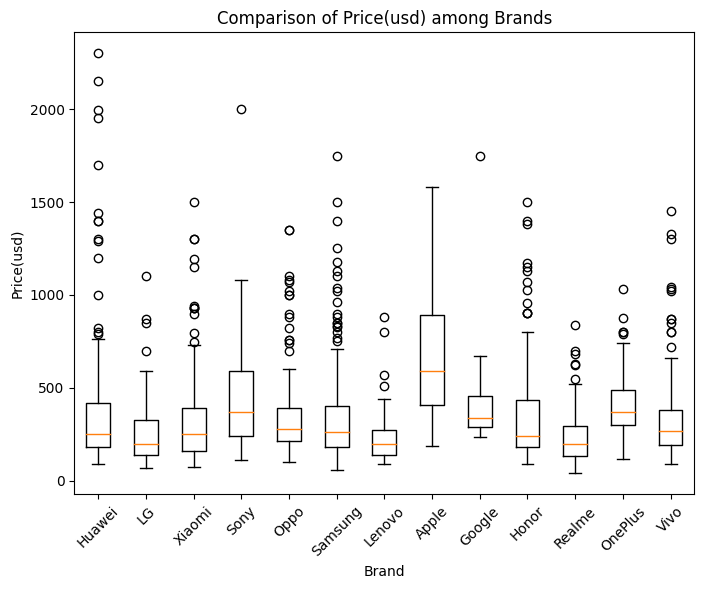

In [81]:
# How does the market share of one brand compare to its competitors over price

# Get the unique brands from the dataset
unique_brands = df['brand'].unique()

# Specifications to compare
specs_to_compare = ['price(USD)']

# Iterate through each specification
for spec in specs_to_compare:
    # Create a list to store data for each brand
    data = []

    # Iterate through each brand for comparison
    for brand in unique_brands:
        # Filter data for the specific brand and the current specification
        brand_data = df[df['brand'] == brand][spec]
        data.append(brand_data)

    # Create a box plot for the specification across different brands
    plt.figure(figsize=(8, 6))
    plt.boxplot(data, labels=unique_brands)
    plt.title(f'Comparison of {spec.capitalize()} among Brands')
    plt.xlabel('Brand')
    plt.ylabel(spec.capitalize())
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.show()


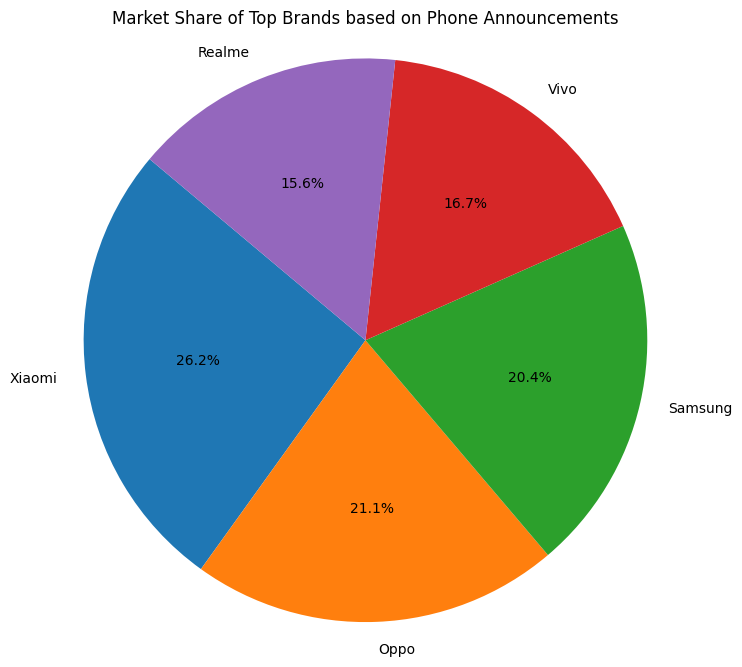

In [82]:
# Market share of the top brands based on phone announcements
# Convert 'announcement_date' column to datetime if it's not already
df['announcement_date'] = pd.to_datetime(df['announcement_date'])

# Group by brand and year, then count the number of announcements
brand_announcements = df.groupby(['brand', df['announcement_date'].dt.year])['phone_name'].count().reset_index()
brand_announcements.columns = ['brand', 'year', 'announcements']

# Find the total announcements for each brand
total_announcements = brand_announcements.groupby('brand')['announcements'].sum().sort_values(ascending=False)

# Select top brands based on total announcements (you can change the number)
top_brands = total_announcements.head(5)  # Display top 5 brands

# Pie chart data
labels = top_brands.index
sizes = top_brands.values

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Market Share of Top Brands based on Phone Announcements')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.show()


Removing 'phone_name' and 'announcement_date' streamlines the dataset, preventing overfitting from brand-specific details. Eliminating 'os' and 'resolution' focuses on essential features for accurate price predictions, enhancing model performance. This reduction aids in creating a more generalized and efficient predictive model for cellphone prices.

In [83]:
#Implementing models
#Removing unwanted columns
columns_to_remove = ['phone_name', 'announcement_date','os', 'resolution']
df = df.drop(columns=columns_to_remove)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         1512 non-null   object 
 1   inches        1512 non-null   float64
 2   battery       1512 non-null   int64  
 3   battery_type  1512 non-null   object 
 4   ram(GB)       1512 non-null   int64  
 5   weight(g)     1512 non-null   float64
 6   storage(GB)   1512 non-null   int64  
 7   video_720p    1512 non-null   bool   
 8   video_1080p   1512 non-null   bool   
 9   video_4K      1512 non-null   bool   
 10  video_8K      1512 non-null   bool   
 11  video_30fps   1512 non-null   bool   
 12  video_60fps   1512 non-null   bool   
 13  video_120fps  1512 non-null   bool   
 14  video_240fps  1512 non-null   bool   
 15  video_480fps  1512 non-null   bool   
 16  video_960fps  1512 non-null   bool   
 17  price(USD)    1512 non-null   float64
dtypes: bool(10), float64(3), int

**Correlation Matrix**

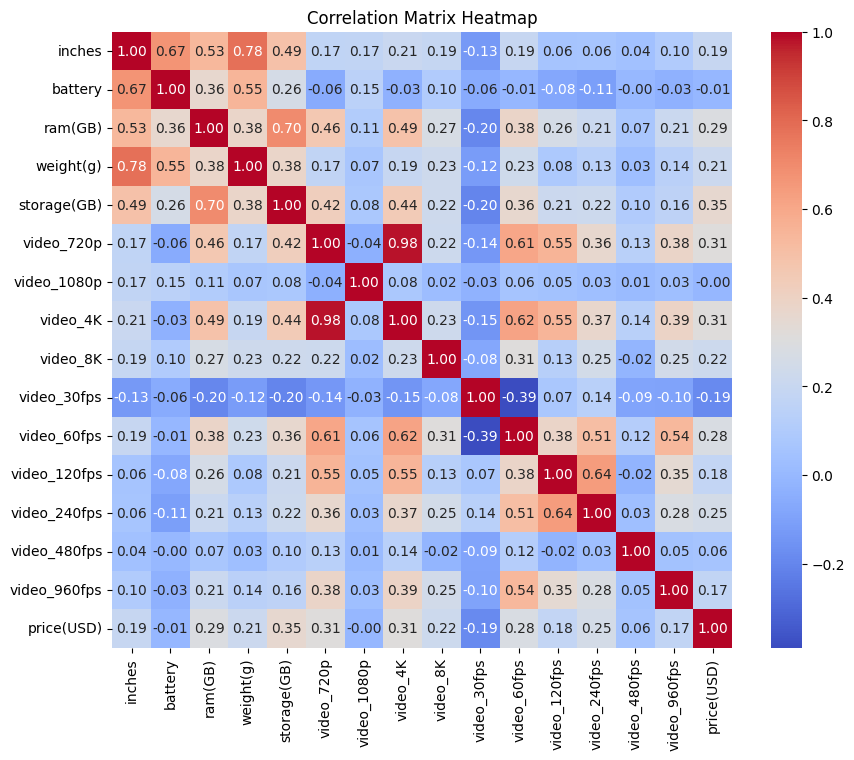

In [85]:
# Selecting numerical columns only
numeric_columns = df.select_dtypes(include=['float64', 'int64', 'bool'])

# Generating the correlation matrix
correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

The below code iterates through specified categorical columns and prints their unique values

In [86]:
#Catergorical columns - Unique values
columns_to_check = ['brand','battery_type', 'video_720p', 'video_1080p', 'video_4K', 'video_8K',
                    'video_30fps', 'video_60fps', 'video_120fps', 'video_240fps', 'video_480fps', 'video_960fps']

for column in columns_to_check:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}': {unique_values}\n")

Unique values in 'brand': ['Huawei' 'LG' 'Xiaomi' 'Sony' 'Oppo' 'Samsung' 'Lenovo' 'Apple' 'Google'
 'Honor' 'Realme' 'OnePlus' 'Vivo']

Unique values in 'battery_type': ['Li-Po' 'Li-Ion']

Unique values in 'video_720p': [ True False]

Unique values in 'video_1080p': [False  True]

Unique values in 'video_4K': [False  True]

Unique values in 'video_8K': [False  True]

Unique values in 'video_30fps': [ True False]

Unique values in 'video_60fps': [False  True]

Unique values in 'video_120fps': [False  True]

Unique values in 'video_240fps': [False  True]

Unique values in 'video_480fps': [False  True]

Unique values in 'video_960fps': [False  True]



In [87]:
#One-Hot encoding categoical columns
columns_to_encode = ['brand','battery_type', 'video_720p', 'video_1080p', 'video_4K', 'video_8K',
                     'video_30fps', 'video_60fps', 'video_120fps', 'video_240fps', 'video_480fps', 'video_960fps']


df = pd.get_dummies(df, columns=columns_to_encode)

In [88]:
df.head()

,inches,battery,ram(GB),weight(g),storage(GB),price(USD),brand_Apple,brand_Google,brand_Honor,brand_Huawei,...,video_60fps_False,video_60fps_True,video_120fps_False,video_120fps_True,video_240fps_False,video_240fps_True,video_480fps_False,video_480fps_True,video_960fps_False,video_960fps_True
0,5.0,2200,2,140.0,16,120.0,0,0,0,1,...,1,0,1,0,1,0,1,0,1,0
1,5.3,2700,2,140.0,16,100.0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
2,5.2,3000,4,147.0,16,420.0,0,0,0,1,...,1,0,1,0,1,0,1,0,1,0
3,5.5,4100,4,165.0,32,150.0,0,0,0,0,...,1,0,0,1,1,0,1,0,1,0
4,5.1,3200,4,145.0,32,420.0,0,0,0,1,...,0,1,1,0,1,0,1,0,1,0


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   inches               1512 non-null   float64
 1   battery              1512 non-null   int64  
 2   ram(GB)              1512 non-null   int64  
 3   weight(g)            1512 non-null   float64
 4   storage(GB)          1512 non-null   int64  
 5   price(USD)           1512 non-null   float64
 6   brand_Apple          1512 non-null   uint8  
 7   brand_Google         1512 non-null   uint8  
 8   brand_Honor          1512 non-null   uint8  
 9   brand_Huawei         1512 non-null   uint8  
 10  brand_LG             1512 non-null   uint8  
 11  brand_Lenovo         1512 non-null   uint8  
 12  brand_OnePlus        1512 non-null   uint8  
 13  brand_Oppo           1512 non-null   uint8  
 14  brand_Realme         1512 non-null   uint8  
 15  brand_Samsung        1512 non-null   u

**Modelling and Evalution**

In [90]:
# Split the data into features (X) and the target variable (y)
X = df.drop('price(USD)', axis=1)
y = df['price(USD)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_reg_predictions = lin_reg.predict(X_test)

# Decision Tree Regressor
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)
tree_reg_predictions = tree_reg.predict(X_test)

# Random Forest Regressor
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X_train, y_train)
forest_reg_predictions = forest_reg.predict(X_test)

# Ensemble methods - Voting Regressor
# A voting regressor is an ensemble meta-estimator that fits several base regressors, each on the whole dataset.
# Then it averages the individual predictions to form a final prediction.
voting_reg = VotingRegressor([('lr', lin_reg), ('dt', tree_reg), ('rf', forest_reg)])
voting_reg.fit(X_train, y_train)
voting_reg_predictions = voting_reg.predict(X_test)

# Calculating evaluation metrics for each model
metrics = {'MSE': [], 'R-squared': [], 'MAE': [], 'RMSE': []}

for model, predictions in zip(
    [lin_reg, tree_reg, forest_reg, voting_reg],
    [lin_reg_predictions, tree_reg_predictions, forest_reg_predictions, voting_reg_predictions]
):
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    rmse = mean_squared_error(y_test, predictions, squared=False)

    metrics['MSE'].append(mse)
    metrics['R-squared'].append(r2)
    metrics['MAE'].append(mae)
    metrics['RMSE'].append(rmse)

# Print metrics for each model
model_names = [
    'Linear Regression',
    'Decision Tree Regressor',
    'Random Forest Regressor',
    'Voting Regressor'
]

for i, model_name in enumerate(model_names):
    print(f"Evaluation for {model_name}:")
    print(f"Mean Squared Error (MSE): {metrics['MSE'][i]}")
    print(f"R-squared Score: {metrics['R-squared'][i]}")
    print(f"Mean Absolute Error (MAE): {metrics['MAE'][i]}")
    print(f"Root Mean Squared Error (RMSE): {metrics['RMSE'][i]}")
    print("\n")



Evaluation for Linear Regression:
Mean Squared Error (MSE): 53226.92087937304
R-squared Score: 0.24362771137373818
Mean Absolute Error (MAE): 145.73201262453946
Root Mean Squared Error (RMSE): 230.70960291971602


Evaluation for Decision Tree Regressor:
Mean Squared Error (MSE): 87180.88691955702
R-squared Score: -0.23886946444363621
Mean Absolute Error (MAE): 176.85365896589659
Root Mean Squared Error (RMSE): 295.26409690234436


Evaluation for Random Forest Regressor:
Mean Squared Error (MSE): 59326.63568020022
R-squared Score: 0.15694873074427518
Mean Absolute Error (MAE): 140.62121120658495
Root Mean Squared Error (RMSE): 243.57059691227144


Evaluation for Voting Regressor:
Mean Squared Error (MSE): 56937.561387960246
R-squared Score: 0.19089827282308414
Mean Absolute Error (MAE): 141.6427374918042
Root Mean Squared Error (RMSE): 238.61592861324294




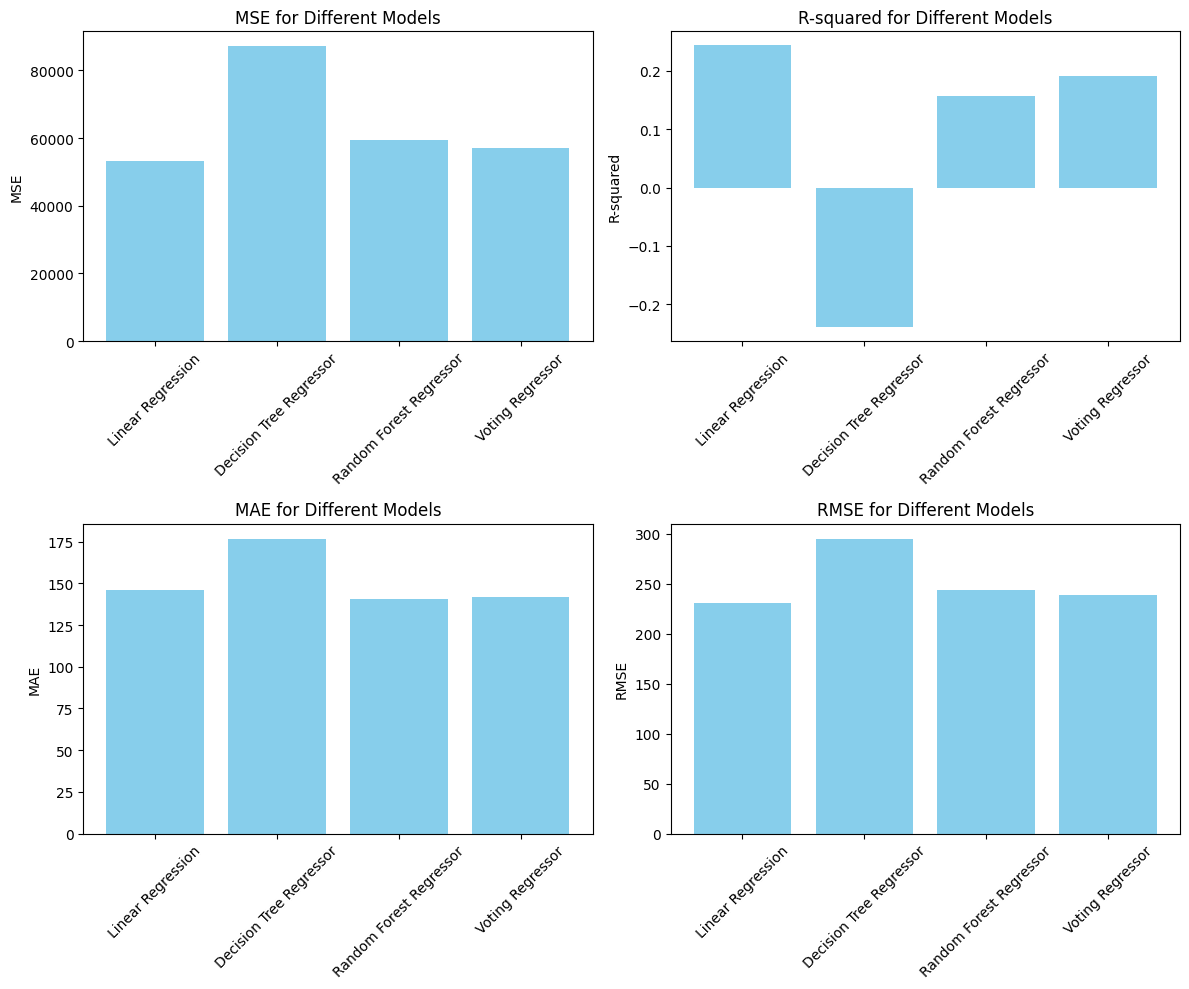

In [91]:
# Plotting MSE, R-squared, MAE, RMSE for each model
model_names = [
    'Linear Regression',
    'Decision Tree Regressor',
    'Random Forest Regressor',
    'Voting Regressor'
]

plt.figure(figsize=(12, 10))

for i, (metric, values) in enumerate(metrics.items(), 1):
    plt.subplot(2, 2, i)
    plt.bar(model_names, values, color='skyblue')
    plt.title(f'{metric} for Different Models')
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()